*Think Linear Algebra* is not for sale yet, but if you would like to support this project, you can [buy me a coffee](https://buymeacoffee.com/allendowney).

# Dot Product



[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/ThinkLinearAlgebra/blob/main/nb/dot.ipynb).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkLinearAlgebra/raw/main/utils.py")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import decorate

In [70]:
from utils import set_precision

set_precision(4)

## Polar Coordinates

Let's start with a two-dimensional vector, `v`.

In [180]:
v = np.array([1.5, 2])
v

array([1.5, 2. ])

Here's the graphical representation of this vector as an arrow with its tail at the origin and its head at the point $(1.5, 2)$ in Cartesian coordinates. 

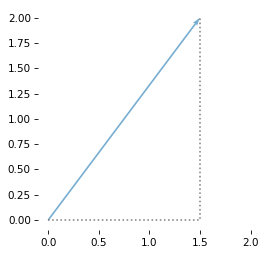

In [214]:
plot_vectors(v)
plt.plot([0, 1.5, 1.5], [0, 0, 2], ':', color='gray')
decorate(aspect='equal', xlim=[-0.1, 2.1], ylim=[-0.1, 2.1])
remove_spines()

To compute the length of this vector, we can use the Pythagorean formula to compute the hypotenuse of a right triangle with side lengths $1.5$ and $2$.

In [182]:
x, y = v
np.sqrt(x**2 + y**2)

2.5000

Or the `hypot` function does the same thing.

In [183]:
np.hypot(x, y)

2.5000

The length of a vector is called a `norm` -- to be more precise, the length we computed is the 2-norm.
NumPy provides a function that computes it, and it works with any number of dimensions.

In [184]:
from numpy.linalg import norm

norm(v)

2.5000

To represent the direction of the vector, we'll use the angle it forms with the positive $x$ axis, which we can compute using the inverse tangent function, `arctan2`.

In [185]:
theta = np.arctan2(y, x)
theta

0.9273

The length and angle we just computed represent the vector in polar coordinates.
We'll use the following function to convert from Cartesian to polar coordinates.

In [186]:
def cart2pol(v):
    x, y = np.transpose(v)
    r = np.hypot(x, y)
    theta = np.arctan2(y, x)
    return r, theta

Here's the polar representation of `v`.

In [187]:
r, theta = cart2pol(v)
r, theta

(2.5000, 0.9273)

## Projection

Projection might be the most important idea in linear algebra.
To introduce the idea, we'll start by computing the **scalar projection** of `v` onto the $x$ axis, which you can think of as the shadow `v` would cast on the $x$ axis if lighted from above.
By the rules of trigonometry, we can compute it like this.

In [227]:
scalar_proj_x = r * np.cos(theta)
scalar_proj_x

1.5000

Similarly, we can compute the projection of `v` onto the $y$ axis.

In [228]:
scalar_proj_y = r * np.sin(theta)
scalar_proj_y

2.0000

You might notice that these scalar projection are the coordinates of `v`.
So we have found a way to convert polar to Cartesian coordinates, which we can wrap in a function.

In [229]:
def pol2cart(r, theta):
    return r * np.array([np.cos(theta), np.sin(theta)])

In [230]:
pol2cart(r, theta)

array([1.5, 2. ])

Scalar projection is so called because it is a scalar -- that is, a single number, not a vector.
Often it is also useful to compute a **vector projection**.
The vector projection of `v` onto `u` is a vector whose length is the scalar projection and whose direction is the direction of `u`.

To compute the vector projection of `v` onto the $x$ and $y$ axes, we'll define unit vectors that point along the axes.


In [231]:
x_hat = np.array([1, 0])
y_hat = np.array([0, 1])

And multiply them by the scalar projections we just computed.

In [232]:
vector_proj_x = scalar_proj_x * x_hat
vector_proj_y = scalar_proj_y * y_hat

The following figure shows `v` and these vector projections.

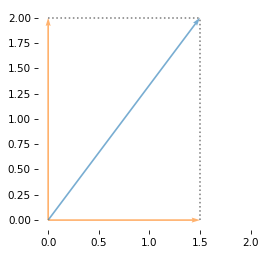

In [233]:
from utils import plot_rejection, remove_spines

plot_vectors([vector_proj_x, vector_proj_y], color='C1')
# plot_vectors([x_hat, y_hat], color='C4', alpha=0.9)
plot_vectors(v)
plot_rejection(v, x_hat)
plot_rejection(v, y_hat)
decorate(aspect='equal', xlim=[-0.1, 2.1], ylim=[-0.1, 2.1])
remove_spines()

In the example so far, it might seem like we've gone in a circle.
We converted `v` from Cartesian to polar coordinates and then back to Cartesian coordinates.

That might not be useful, but I hope it demonstrates the concept of projection.
Now let's do something that will turn out to be surprisingly useful, projecting one vector onto another.
To demonstrate, here's another vector, `u`, in Cartesian coordinates.

In [234]:
u = np.array([3, 1])

array([3, 1])

Here's a graphical representation of `v` and `u`, and a dotted line that shows the shadow of `v` on `u`, lit from a point on a line perpendicular to `u`.
That's the projection we'll compute -- and we'll do it two ways.

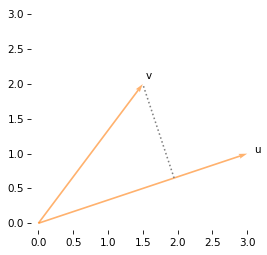

In [250]:
plot_vectors([v, u], color='C1', labels='vu')
plot_rejection(v, u)
decorate(aspect='equal', xlim=[-0.1, 3.1], ylim=[-0.1, 3.1])
remove_spines()

The first way is to convert `u` and `v` to polar coordinates.

In [237]:
rs, thetas = cart2pol([u, v])
rs

array([3.1623, 2.5   ])

`thetas` contains two angles: from `v` to the $x$ axis, and from `u` to the $x$ axis.

In [200]:
thetas

array([0.3218, 0.9273])

So the difference is the angle between the vectors -- which the following function computes.

In [201]:
def angle_between(u, v):
    rs, thetas = cart2pol([u, v])
    return np.diff(thetas)

In [241]:
theta = angle_between(u, v)

If you look again at the previous figure, you'll see why this angle is useful.
It is the angle of a right triangle whose hypotenuse is the length of `v`.
So the length of the adjacent side is $||v|| \cos \theta$.

In [246]:
scalar_proj = norm(v) * np.cos(theta)
scalar_proj

array([2.0555])

Before we go on, notice that when `theta=0`, the cosine is 1, so the scalar projection is `norm(v)`.

Now, to find the vector projection, we can multiply the scalar projection by a unit vector in the direction of `u`.

In [247]:
u_hat = u / norm(u)
vector_proj = scalar_proj * u_hat

The following figure shows the result.

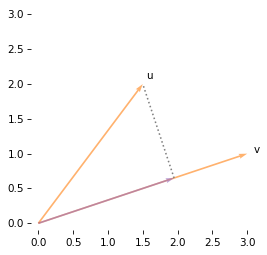

In [251]:
plot_vectors([u, v], color='C1', labels='vu')
plot_rejection(v, u)
plot_vector(vector_proj, color='C4')
decorate(aspect='equal', xlim=[-0.1, 3.1], ylim=[-0.1, 3.1])
remove_spines()

In [73]:
np.dot(u, v)

11

In [74]:
u @ v

11

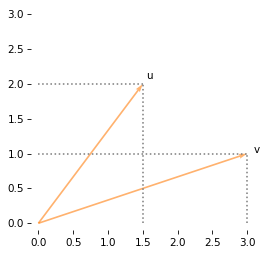

In [253]:
plot_vectors([u, v], color='C1', labels='vu')
for a in [u, v]:
    for b in [x_hat, y_hat]:
        plot_rejection(a, b)

decorate(aspect='equal', xlim=[-0.1, 3.1], ylim=[-0.1, 3.1])
remove_spines()

In [75]:
from sympy import symbols, Matrix

u1, u2, v1, v2 = symbols('u1 u2 v1 v2')

u_sym = np.array([u1, u2])
v_sym = np.array([v1, v2])

In [76]:
u_sym @ v_sym

u1*v1 + u2*v2

In [77]:
u_sym @ u_sym

u1**2 + u2**2

In [80]:
u @ u

17

In [79]:
from numpy.linalg import norm

norm(u) ** 2

17.0000

In [81]:
np.atan2(*u)

1.3258

## Collisions

9-foot table (standard regulation)

In [4]:
table_width = 100
table_height = 50

ball_diameter = 2.25
ball_radius = ball_diameter / 2

In [5]:
from utils import underride, decorate


def draw_circles(vs, **options):
    underride(options, color="C1", alpha=0.6, lw=0)
    ax = options.pop("ax", plt.gca())
    for x, y in vs:
        ax.add_patch(plt.Circle((x, y), ball_radius, **options))

In [6]:
from utils import cartesian_product


def draw_table():
    fig, ax = plt.subplots(figsize=(5, 2.5))

    ax.add_patch(plt.Rectangle((0, 0), table_width, table_height, fill=None))

    xs = [0, 50, 100]
    ys = [0, 50]
    pockets = cartesian_product([xs, ys])
    draw_circles(pockets, color="black")

    # Remove ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Set the aspect ratio and limits
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim(0, table_width)
    ax.set_ylim(0, table_height)

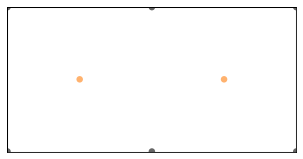

In [7]:
draw_table()
cue = np.array([25, 25])
target = np.array([75, 25])
draw_circles([cue, target])

In [8]:
from utils import polar_to_cartesian

r = 1
theta = 0.033
direction = np.array(polar_to_cartesian(r, theta))
direction

array([0.99945555, 0.03299401])

In [9]:
magnitude = 47
v = magnitude * direction

In [10]:
from numpy.linalg import norm


def distance_between(v1, v2):
    return norm(v1 - v2)

In [11]:
pos1 = cue + v
pos2 = target
distance_between(pos1, pos2)

np.float64(3.399840844152523)

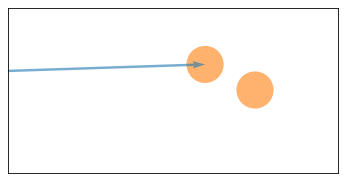

In [14]:
from utils import plot_vector, label_vector

draw_table()
draw_circles([pos1, pos2])
plot_vector(v, cue)
# label_vector(v, cue, 'v', label_pos=1, offset=0.015)
decorate(xlim=[60, 80], ylim=[20, 30])

In [15]:
def objective_func(magnitude, direction, pos1, pos2):
    v = magnitude * direction
    return distance_between(pos1 + v, [pos2])

In [16]:
objective_func(magnitude, direction, cue, target)

np.float64(3.399840844152523)

In [17]:
from scipy.optimize import minimize_scalar


def minimize_distance(direction, pos1, pos2):
    args = (direction, pos1, target)

    upper = distance_between(pos1, pos2)
    solution = minimize_scalar(
        objective_func, bounds=(0, upper), args=args, method="bounded"
    )

    assert solution.success
    return solution

In [18]:
solution = minimize_distance(direction, cue, target)
solution.fun

np.float64(1.6497005413060046)

In [19]:
distance_to_min = solution.x

In [20]:
def will_hit(direction, pos1, pos2, thresh):
    solution = minimize_distance(direction, pos1, pos2)
    return solution.fun < thresh

In [21]:
will_hit(direction, cue, target, ball_diameter)

np.True_

In [22]:
def error_func(magnitude, direction, pos1, pos2, goal_distance):
    actual_distance = objective_func(magnitude, direction, pos1, pos2)
    return actual_distance - goal_distance

In [23]:
error_func(magnitude, direction, cue, target, ball_diameter)

np.float64(1.1498408441525232)

In [24]:
lower = distance_to_min - ball_diameter
upper = distance_to_min

In [25]:
from scipy.optimize import root_scalar

args = (direction, cue, target, ball_diameter)
solution = root_scalar(error_func, bracket=[lower, upper], args=args, method="brentq")
assert solution.converged

In [26]:
magnitude = solution.root
magnitude

48.442748672152476

In [27]:
v_soln = magnitude * direction
pos1 = cue + v_soln
pos2 = target

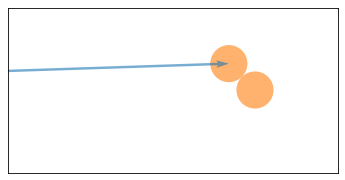

In [29]:
draw_table()
draw_circles([pos1, target])
plot_vector(v_soln, cue)
# label_vector(v_soln, cue, 'v_soln', label_pos=1, offset=0.015)
decorate(xlim=[60, 80], ylim=[20, 30])

In [30]:
def normalize(v):
    return v / norm(v)

In [31]:
v1 = v / norm(v)
v2 = np.array([0, 0])
n = normalize(pos2 - pos1)

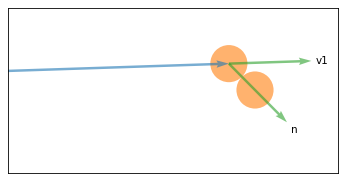

In [32]:
from utils import plot_vectors

draw_table()
draw_circles([pos1, target])
plot_vector(v_soln, cue)
plot_vectors([v1, n], [pos1, pos1], labels=['v1', 'n'], scale=5, color="C2")
decorate(xlim=[60, 80], ylim=[20, 30])

In [33]:
def dot(v, w):
    return np.dot(v, w)

In [34]:
v1_normal = dot(v1, n) / dot(n, n) * n
v1_tangent = v1 - v1_normal

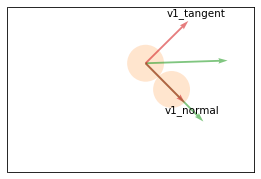

In [35]:
draw_table()
draw_circles([pos1, target], alpha=0.2)
plot_vectors([v1 * 5, n * 5], [pos1, pos1], color="C2")
plot_vectors([v1_normal * 5, v1_tangent * 5], [pos1, pos1], labels=['v1_normal', 'v1_tangent'], color="C3")
decorate(xlim=[65, 80], ylim=[20, 30])

In [36]:
v2_normal = dot(v2, n) / dot(n, n) * n
v2_tangent = v2 - v2_normal

In [37]:
v1_after = v1_tangent + v2_normal
v2_after = v2_tangent + v1_normal

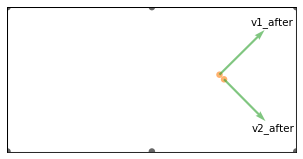

In [38]:
draw_table()
draw_circles([pos1, target], alpha=0.6)
plot_vectors([v1_after, v2_after], [pos1, pos2], scale=30, labels=['v1_after', 'v2_after'], color="C2")

In [39]:
pocket1 = np.array([100, 50])
pocket2 = np.array([100, 0])

In [40]:
will_hit(v2_after, pos2, pocket2, ball_diameter)

np.True_

In [41]:
will_hit(v1_after, pos1, pocket1, ball_diameter)

np.False_

TypeError: label_vector() got multiple values for argument 'label'

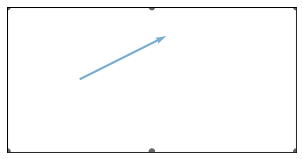

In [42]:
from utils import label_vector

draw_table()
origin = cue
vector = np.array([30, 15])
plot_vector(vector, origin)

for pos in range(12):
    label_vector(vector, origin, label=pos, label_pos=pos, color='C1')

[Think Linear Algebra](https://allendowney.github.io/ThinkLinearAlgebra/index.html)

Copyright 2025 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)